In [1]:
# Import Basic Packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime as dt

# Pre-Processing the data

In [2]:
#reading the dataset
df = pd. read_pickle('Interview_Data_2022.pkl')
df

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
2016-01-01 07:24:00-07:00,9.807612,1.301536,NaN,NaN
2016-01-01 07:25:00-07:00,9.907775,3.096331,NaN,NaN
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205
...,...,...,...,...
2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031
2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.69169
2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843
2020-12-31 16:44:00-07:00,1.897676,9.303919,NaN,NaN


In [3]:
df.index.name = 'datetime' #naming the index column as datetime
#check out the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337487 entries, 2016-01-01 07:24:00-07:00 to 2020-12-31 16:45:00-07:00
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Ambient Temperature (C)  1337487 non-null  float64
 1   Wind Speed (m/s)         1337487 non-null  float64
 2   POA Irradiance (w/m^2)   1329517 non-null  float64
 3   Power (kw)               1329531 non-null  object 
dtypes: float64(3), object(1)
memory usage: 51.0+ MB


There are 1337487 total rows. The data type of frist three columns i.e Ambient Temperature (C), Wind Speed (m/s) and POA Irradiance (w/m^2) are all in float64 format which is good. However, Power(kW) data is in object format. Therefore it need to be changed to float64. 

In [4]:
#converting Power (kw) column to float64 dtype.
df['Power (kw)'] = df['Power (kw)'].astype(float, errors = 'raise') 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337487 entries, 2016-01-01 07:24:00-07:00 to 2020-12-31 16:45:00-07:00
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Ambient Temperature (C)  1337487 non-null  float64
 1   Wind Speed (m/s)         1337487 non-null  float64
 2   POA Irradiance (w/m^2)   1329517 non-null  float64
 3   Power (kw)               1329531 non-null  float64
dtypes: float64(4)
memory usage: 51.0 MB


## Working with NaNs¶

In [5]:
# count the number of nulls in the data set
df.isna().sum()

Ambient Temperature (C)       0
Wind Speed (m/s)              0
POA Irradiance (w/m^2)     7970
Power (kw)                 7956
dtype: int64

There are 7970 NaNs on POA Irradiance and Power data. Before filling it using some method, it is good to know how many consecutive NaNs are there.

In [6]:
#Caclulating percentage of NaNs in the dataset
print(df['POA Irradiance (w/m^2)'].isna().sum()/len(df))
print(df['Power (kw)'].isna().sum()/len(df))

0.005958936423307292
0.005948469031848534


In [7]:
#counting maximum number of consecutive nans in POA irradinace
count_nan_POA = df['POA Irradiance (w/m^2)'].isnull().astype(int).groupby(df['POA Irradiance (w/m^2)'].notnull().astype(int).cumsum()).sum()
count_nan_POA.max()

7

In [8]:
#counting maximum number of consecutive nans in Power
count_nan_P = df['Power (kw)'].isnull().astype(int).groupby(df['Power (kw)'].notnull().astype(int).cumsum()).sum()
count_nan_P.max()

7

It apprears to not be that many null values in comparision to the total number of data i.e about 0.6 %. However, it is not a goood idea to delete them becasue that will mess with the time series. Lets check if NaNs occur at same time in both Power and POA Irradiance or not. If not we can find relationship between them to fill them.

In [9]:
#Checking if both POA Irradiance and Power are NaNs at a same row 
df1 = df[['POA Irradiance (w/m^2)','Power (kw)']]
print(df1[df1['POA Irradiance (w/m^2)'].isna() & df1['Power (kw)'].isna()])

                           POA Irradiance (w/m^2)  Power (kw)
datetime                                                     
2016-01-01 07:24:00-07:00                     NaN         NaN
2016-01-01 07:25:00-07:00                     NaN         NaN
2016-01-01 16:44:00-07:00                     NaN         NaN
2016-01-01 16:45:00-07:00                     NaN         NaN
2016-01-02 07:24:00-07:00                     NaN         NaN
...                                           ...         ...
2020-12-30 16:44:00-07:00                     NaN         NaN
2020-12-31 07:24:00-07:00                     NaN         NaN
2020-12-31 07:25:00-07:00                     NaN         NaN
2020-12-31 16:44:00-07:00                     NaN         NaN
2020-12-31 16:45:00-07:00                     NaN         NaN

[7932 rows x 2 columns]


In [10]:
df['POA Irradiance (w/m^2)'].isna().sum() - 7932

38

In [11]:
df['Power (kw)'].isna().sum() - 7932

24

More than 99 % of the NaNs value occur at a same time. So, we cannot fill NaNs by finding correlation of each other. So, Lets do it using some popular method used for time series. If there were not any consecutive NaNs forward filling/backward filling would be best. But there are consecutive NaNs so moving average gives good prediction.  

In [12]:
#df['POA Irradiance (w/m^2)']=df['POA Irradiance (w/m^2)'].fillna(df['POA Irradiance (w/m^2)'].rolling(100).mean())
#Applying moving average method for Power column
for i in range(3,len(df)):
    if pd.isna(df.iloc[i, 3]):
        moving = df.iloc[i-11:i-1, 3].mean()
        df.iloc[i, 3] = moving
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337487 entries, 2016-01-01 07:24:00-07:00 to 2020-12-31 16:45:00-07:00
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Ambient Temperature (C)  1337487 non-null  float64
 1   Wind Speed (m/s)         1337487 non-null  float64
 2   POA Irradiance (w/m^2)   1329517 non-null  float64
 3   Power (kw)               1337485 non-null  float64
dtypes: float64(4)
memory usage: 51.0 MB


In [13]:
df

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-01-01 07:24:00-07:00,9.807612,1.301536,NaN,NaN
2016-01-01 07:25:00-07:00,9.907775,3.096331,NaN,NaN
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205
...,...,...,...,...
2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031
2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.691690
2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843


In [14]:
#It is obvious that moving average cannot fill first two values. So we will use back filling method to replace those values. 
df['Power (kw)'] = np.where(df['Power (kw)'].isna(), df['Power (kw)'].bfill() ,df['Power (kw)'])
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337487 entries, 2016-01-01 07:24:00-07:00 to 2020-12-31 16:45:00-07:00
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Ambient Temperature (C)  1337487 non-null  float64
 1   Wind Speed (m/s)         1337487 non-null  float64
 2   POA Irradiance (w/m^2)   1329517 non-null  float64
 3   Power (kw)               1337487 non-null  float64
dtypes: float64(4)
memory usage: 51.0 MB


Lets follow the same procedure for POA Irradiance

In [15]:
#Applying moving average method and back filling method for POA Irradiance column
for i in range(3,len(df)):
    if pd.isna(df.iloc[i, 2]):
        moving = df.iloc[i-11:i-1, 2].mean()
        df.iloc[i, 2] = moving
df['POA Irradiance (w/m^2)'] = np.where(df['POA Irradiance (w/m^2)'].isna(), df['POA Irradiance (w/m^2)'].bfill() ,df['POA Irradiance (w/m^2)'])
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337487 entries, 2016-01-01 07:24:00-07:00 to 2020-12-31 16:45:00-07:00
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Ambient Temperature (C)  1337487 non-null  float64
 1   Wind Speed (m/s)         1337487 non-null  float64
 2   POA Irradiance (w/m^2)   1337487 non-null  float64
 3   Power (kw)               1337487 non-null  float64
dtypes: float64(4)
memory usage: 51.0 MB


Now we have complete dataset with no empty values

## Finding physically impossible/unlikely data points

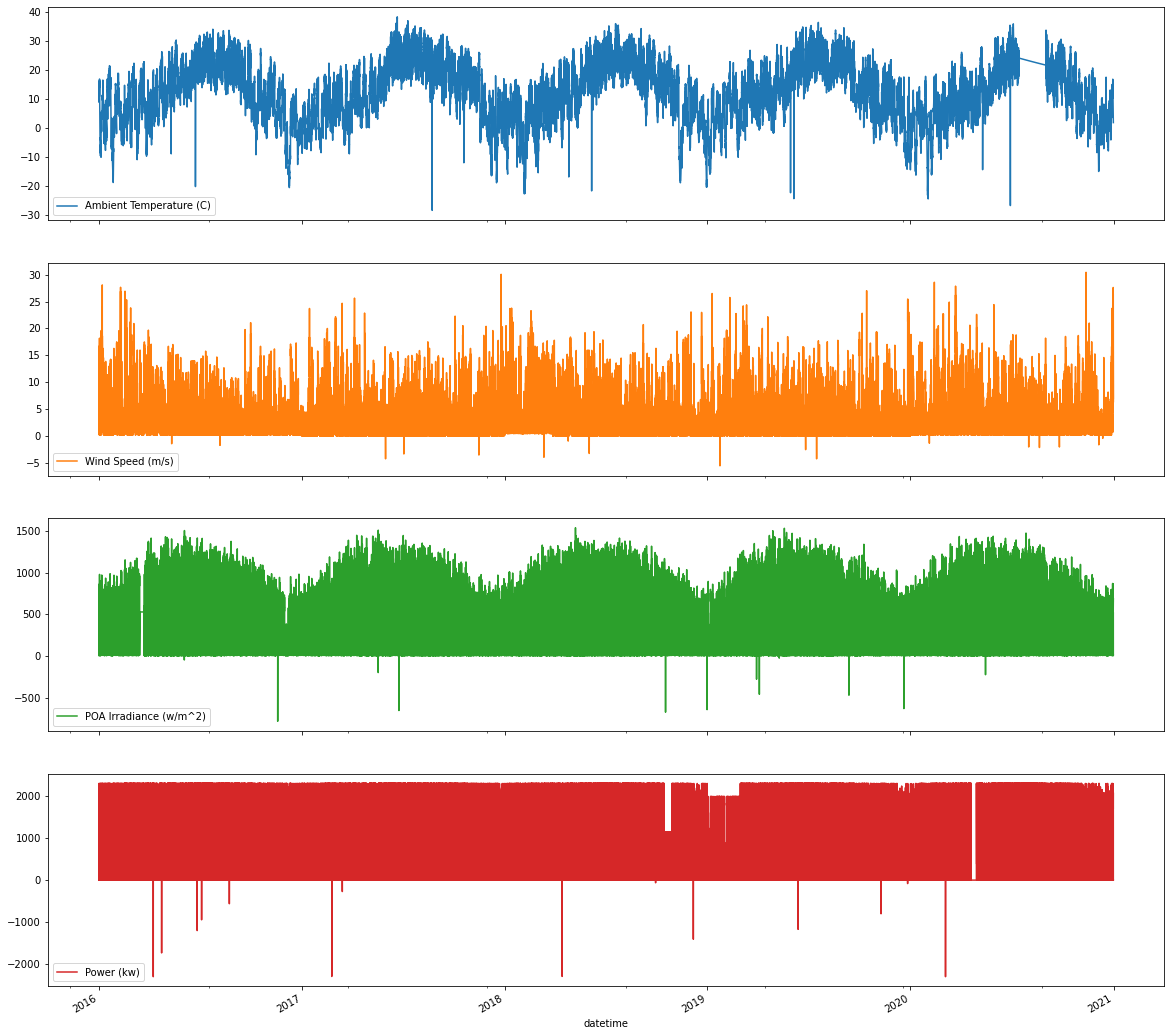

In [16]:
#Lets check the overall dataset after filling NaNs
#Plot of evolution of feature over time. 
plot_cols = ['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)', 'Power (kw)']
plot_features = df[plot_cols]
_ = plot_features.plot(subplots=True, figsize = (20,20))

In [17]:
#Looking at the statistics of dataset. 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),1337487.0,14.065283,10.070531,-28.564103,7.004606,15.079118,22.074986,38.376114
Wind Speed (m/s),1337487.0,3.567276,2.881562,-5.496709,1.701279,2.703734,4.394155,30.425901
POA Irradiance (w/m^2),1337487.0,507.793785,373.083961,-785.021595,132.792583,505.535849,863.440847,1537.720755
Power (kw),1337487.0,1320.751512,903.437338,-2309.278316,371.504837,1460.434011,2304.346729,2317.143741


if we look at the minumum value of the variables from plot and descriptive statistics of dataset:

1) Negative value of wind speed is physically impossible. It can be zero but not below that.

2) Negative value of POA Irradiance is also not possible. Small negative values in the irradiance could be result of the measuring errors and the nature of the measuring instrument. Typically, at nighttime measurement can be negative due to the long wave radiation heat loss from the absorber surface of actinometer to the deep sky. So, data logger error measurement should also consider during measurement. We need to check if it is outlier or there are many such negative data. If there are many such data we need to work on other data as per the negative value of Irradiance.

3) Power also cannot be negative. However, there might be few amount of power that can be leaked to the system through battery packs when the plant is not generating any power specially in the morning.If the battery is connected into the dc bus with a bi-directional boost converter, the battery can also push power back to the PV modules so that the power output from it may be negative. To prevent the dc negative power, a series blocking diode must be connected just after the PV panel. But nowdays all the PV power plant should have such mechanicsm to prevent drawing power form battery. We have to confirm where we got those small negative value or the value are really high. So, first need to confirm it and then filter out those high negative power and low negative power.

In [18]:
#counting no of negative wind speed values
(df['Wind Speed (m/s)'] < 0).sum().sum()

17

In [19]:
#counting no of negative POA Irradiance values
(df['POA Irradiance (w/m^2)'] < 0).sum().sum()

12

In [20]:
#Counting no of negative power values
(df['Power (kw)'] < 0).sum().sum()

55635

The number of negative values for Wind Speed (m/s) and POA Irradiance (w/m^2) are negligible and we can easity filter out. However, the negative value for power is quite much. So we need to check it in detail.

Lets check in detail about negative values

In [21]:
#where are the wind speed negative
Error_df_WS= df.loc[(df['Wind Speed (m/s)'] < 0)]
Error_df_WS

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-05-11 12:16:00-07:00,14.986056,-1.400037,999.038162,2309.183342
2016-08-06 11:24:00-07:00,26.870441,-1.698763,497.445833,1431.275540
2017-05-31 12:42:00-07:00,16.309089,-4.197678,386.120793,1130.980234
2017-07-03 11:00:00-07:00,26.810042,-3.299653,818.634136,2302.449294
2017-11-15 13:13:00-07:00,23.300789,-3.493420,641.161249,1886.752225
2018-03-12 14:48:00-07:00,9.186592,-3.906055,954.408009,2307.448505
2018-04-25 07:54:00-07:00,10.896377,-0.900790,595.145223,1863.441101
2018-06-02 04:55:00-07:00,12.699775,-3.200789,58.690099,112.065611
2019-01-23 12:49:00-07:00,10.814082,-5.496709,770.530063,2000.000000


In [22]:
#where are the POA Irradiance negative
Error_df_POA= df.loc[(df['POA Irradiance (w/m^2)'] < 0)]
Error_df_POA

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-06-03 06:11:00-07:00,8.199398,2.506055,-49.335975,151.557568
2016-11-18 08:21:00-07:00,10.102320,0.600181,-785.021595,2307.570838
2017-05-18 07:14:00-07:00,8.400621,0.600228,-200.564238,632.009058
2017-06-24 13:47:00-07:00,32.481559,4.596756,-656.011665,1716.009508
2018-10-17 13:31:00-07:00,14.211698,2.201149,-675.793710,1020.544768
2018-12-31 08:38:00-07:00,-9.295066,2.700326,-645.518657,2118.463986
2019-03-30 09:48:00-07:00,8.985223,3.296598,-280.084352,871.283216
2019-04-04 10:33:00-07:00,1.000629,3.599742,-460.875641,1446.938097
2019-05-10 05:55:00-07:00,9.894949,2.498430,-26.917482,73.165729


In [23]:
#It seems that there are very few high negative power value and all other are close to zero. So lets check: 
 #where power is less than -1 kw  
Error_df_P= df.loc[(df['Power (kw)'] < -1)]
print(len(Error_df_P))
Error_df_P

14


,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-04-08 08:42:00-07:00,9.808707,1.199444,1037.486998,-2309.278316
2016-04-23 09:06:00-07:00,21.914132,1.798144,576.604082,-1740.427083
2016-06-26 10:46:00-07:00,24.581756,2.499785,424.512411,-1206.446723
2016-07-04 08:28:00-07:00,18.778378,2.502892,326.464106,-949.069201
2016-08-23 07:25:00-07:00,20.535925,1.502677,174.396731,-564.674849
2017-02-23 16:20:00-07:00,4.399444,1.001461,855.424367,-2303.267095
2017-03-14 16:13:00-07:00,9.109461,11.698531,87.634938,-273.008156
2018-04-14 10:24:00-07:00,-1.900848,2.200687,1033.911571,-2302.351395
2018-09-29 15:57:00-07:00,13.422079,2.401021,24.546701,-63.715067


Lets first filter out these negative values in wind and POA irradiance. First of all lets see correlation of features in data set removing the unlikely values

In [24]:
df1 = df[df >= 0]
df1.dropna(inplace = True)
df1

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-01-01 07:39:00-07:00,9.002255,2.500149,12.936129,0.861401
2016-01-01 07:40:00-07:00,8.996669,2.895838,13.608054,8.272520
2016-01-01 07:41:00-07:00,9.106908,2.403802,14.376006,14.983253
2016-01-01 07:42:00-07:00,9.203936,3.695459,15.455331,21.708371
2016-01-01 07:43:00-07:00,9.197455,2.999468,16.794129,28.011696
...,...,...,...,...
2020-12-31 16:25:00-07:00,2.201156,11.578501,15.107673,22.438004
2020-12-31 16:26:00-07:00,2.103948,11.708075,14.459017,18.508213
2020-12-31 16:27:00-07:00,2.097064,10.790878,13.788398,14.071687


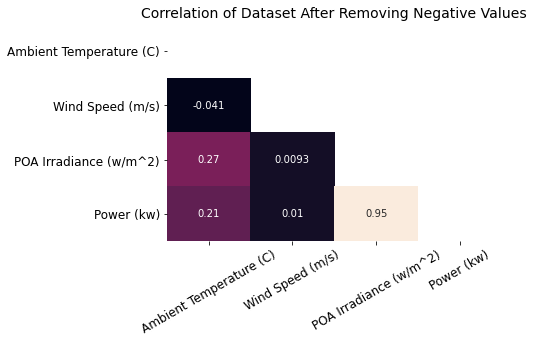

In [25]:
#Lokking at the correlation of different features of dataset. 
#developing function to get customized heatmap
def correlation_heat_map(df, title, size):
    corrs = df.corr()
    
    # set figure size
    fig, ax = plt.subplots(figsize = size)
    
    # generate a mask for the upper triagle 
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    #plot heatmap
    ax = sns.heatmap(corrs, mask=mask, annot = True, cbar=False)
    
    #resize labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_title(title, fontsize=14)
    
    plt.show()
correlation_heat_map(df1[['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)','Power (kw)']], 'Correlation of Dataset After Removing Negative Values', (6,4))

Populating the interactive namespace from numpy and matplotlib
0.9039435916909184
2.267676453326058
168.42319427925486


<ipython-input-26-2a0522a2465b>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


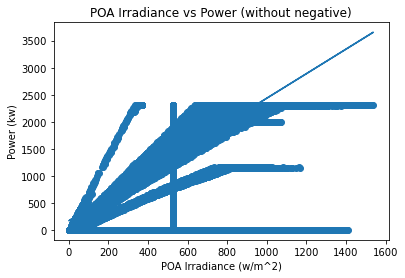

In [26]:
#Lets check the R2 value by making linear model for POA Irradiance feature with Power
import scipy.stats
%pylab inline
m, b, r_value, p_value, std_err = scipy.stats.linregress(df1['POA Irradiance (w/m^2)'], df1['Power (kw)'])

fig, ax = plt.subplots()
ax.scatter(df1['POA Irradiance (w/m^2)'],df1['Power (kw)'])
ax.plot(df1['POA Irradiance (w/m^2)'], m*df1['POA Irradiance (w/m^2)'] + b)
ax.set_xlabel("POA Irradiance (w/m^2)")
ax.set_ylabel("Power (kw)")
ax.set_title("POA Irradiance vs Power (without negative)")  
fig.show()

print(r_value**2)
print(m)
print(b)

Populating the interactive namespace from numpy and matplotlib
0.8503916700756363


<ipython-input-27-499b8c778750>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


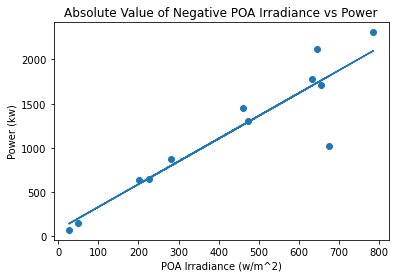

In [27]:
#Lets check the R2 value after fitting the negative value of Irradiance by making it negative with power.
import scipy.stats
%pylab inline
m2, b2, r_value2, p_value2, std_err2 = scipy.stats.linregress(Error_df_POA['POA Irradiance (w/m^2)'].abs(), Error_df_POA['Power (kw)'])

fig, ax = plt.subplots()
ax.scatter(Error_df_POA['POA Irradiance (w/m^2)'].abs(),Error_df_POA['Power (kw)'])
ax.plot(Error_df_POA['POA Irradiance (w/m^2)'].abs(), m2*Error_df_POA['POA Irradiance (w/m^2)'].abs() + b2)
#ax.annotate('r^2: ' + str("{:.2f}".format(r_value**2)), xy=(1950,19500))
#ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(1950,18500))
ax.set_xlabel("POA Irradiance (w/m^2)")
ax.set_ylabel("Power (kw)")
ax.set_title("Absolute Value of Negative POA Irradiance vs Power")                                                            
fig.show()
print(r_value2**2)

Populating the interactive namespace from numpy and matplotlib
0.9580332854554706


<ipython-input-28-10ef2a734ef5>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


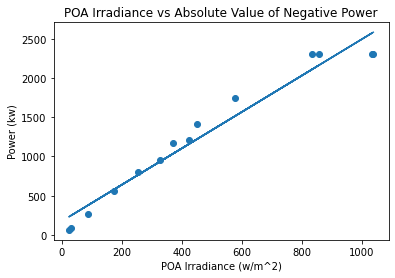

In [28]:
import scipy.stats
%pylab inline
m3, b3, r_value3, p_value3, std_err3 = scipy.stats.linregress(Error_df_P['POA Irradiance (w/m^2)'], Error_df_P['Power (kw)'].abs())

fig, ax = plt.subplots()
ax.scatter(Error_df_P['POA Irradiance (w/m^2)'],Error_df_P['Power (kw)'].abs())
ax.plot(Error_df_P['POA Irradiance (w/m^2)'], m3*Error_df_P['POA Irradiance (w/m^2)'] + b3)
ax.set_xlabel("POA Irradiance (w/m^2)")
ax.set_ylabel("Power (kw)")
ax.set_title("POA Irradiance vs Absolute Value of Negative Power") 
fig.show()

print(r_value3**2)

## Filtering Negative Wind Speed, Negative POA Irradiance and High Negative value of Power

In [29]:
df['Power (kw)'] = np.where(df['Power (kw)'] < -1, df['Power (kw)'].abs() ,df['Power (kw)'])
df.loc[(df['Power (kw)'] < -1)]

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,


In [30]:
df['POA Irradiance (w/m^2)'] = np.where(df['POA Irradiance (w/m^2)'] < -1, df['POA Irradiance (w/m^2)'].abs() ,df['POA Irradiance (w/m^2)'])
df.loc[(df['POA Irradiance (w/m^2)'] < 0)]

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,


In [31]:
df['Wind Speed (m/s)'] = np.where(df['Wind Speed (m/s)'] < 0, NaN,df['Wind Speed (m/s)'])
df['Wind Speed (m/s)'] = df['Wind Speed (m/s)'].ffill()
#counting no of negative wind speed values
(df['Wind Speed (m/s)'] < 0).sum().sum()

0

Now, we dont have negative values in wind speed, POA Irradiance column. Our three features columns are now complete. Now we just need to work on small negative power between 0 and -1

### Working with Low Negative Power i.e between 0 and -1

In [32]:
Small_P= df[df['Power (kw)'].between(-1,0, inclusive = False)]
Small_P

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-01-01 07:24:00-07:00,9.807612,1.301536,4.704255,-0.691365
2016-01-01 07:25:00-07:00,9.907775,3.096331,4.704255,-0.691365
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205
...,...,...,...,...
2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031
2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.691690
2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843


In [33]:
len(Small_P)/len(df)

0.04158619859482746

We need to work on 55621 negative power data which is 4.1% of total dataset.

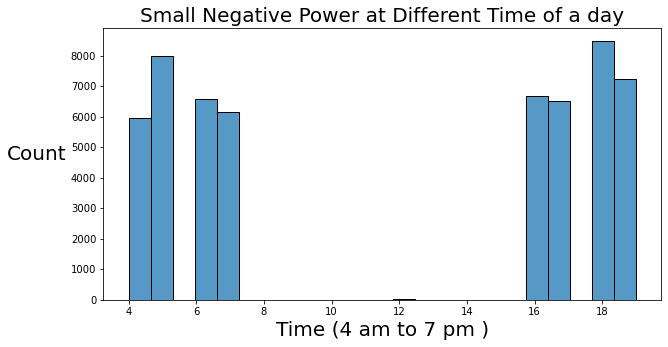

In [34]:
#Checking occurange of small negative value at time of day
df2= Small_P.reset_index()
import datetime as dt
df2['hour'] = df2['datetime'].dt.hour

# Create a histogram of the count of negative values at different time

plt.figure(figsize=(10,5))
sns.histplot(df2['hour'])

plt.title('Small Negative Power at Different Time of a day',fontsize=20)

plt.xlabel('Time (4 am to 7 pm )', fontsize=20)

plt.ylabel("Count",rotation='0',ha='right', fontsize=20)
plt.show()

In [35]:
df2.loc[df2['hour'].isin([4,5,6,7,16,17,18,19])]

,datetime,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw),hour
0,2016-01-01 07:24:00-07:00,9.807612,1.301536,4.704255,-0.691365,7
1,2016-01-01 07:25:00-07:00,9.907775,3.096331,4.704255,-0.691365,7
2,2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365,7
3,2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467,7
4,2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205,7
...,...,...,...,...,...,...
55616,2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031,16
55617,2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.691690,16
55618,2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843,16
55619,2020-12-31 16:44:00-07:00,1.897676,9.303919,7.889922,-0.691827,16


In [36]:
len(Small_P) - 55603 


18

Only 18 values are negative at day time. All negative values are in the morning and evening (start and end of power production)

Lets visualize the non negative power at the time where there is negative power

In [37]:
df['Power (kw)'].max()

2317.143740701633

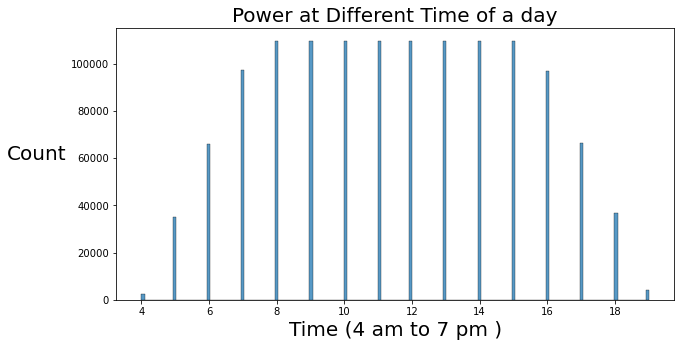

In [38]:
#Checking the power values at the time where there is occurance of negative power

df3= df.reset_index()
df3 = df3[df3['Power (kw)'].between(0,df3['Power (kw)'].max(), inclusive = True)]
df3['hour'] = df3['datetime'].dt.hour

# Create a histogram of the count of negative values at different time

plt.figure(figsize=(10,5))
sns.histplot(df3['hour'])

plt.title('Power at Different Time of a day',fontsize=20)

plt.xlabel('Time (4 am to 7 pm )', fontsize=20)

plt.ylabel("Count",rotation='0',ha='right', fontsize=20)
plt.show()

In [39]:
df4= df3.loc[df3['hour'].isin([4,5,6,7,16,17,18,19])]
df4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),404924.0,15.227954,9.138044,-26.896399,9.192244,16.321201,22.219913,38.321678
Wind Speed (m/s),404924.0,3.223511,2.518603,0.000000,1.598297,2.504884,4.095343,29.676466
POA Irradiance (w/m^2),404924.0,346.015248,352.382554,0.299671,49.867977,169.631016,648.027252,1424.136372
Power (kw),404924.0,916.562522,900.148399,0.000000,125.660087,465.372292,1933.884095,2315.655559
hour,404924.0,11.554623,5.290805,4.000000,6.000000,16.000000,17.000000,19.000000


#Lets check the correlation of features with each other at evening and morining where there is negative power

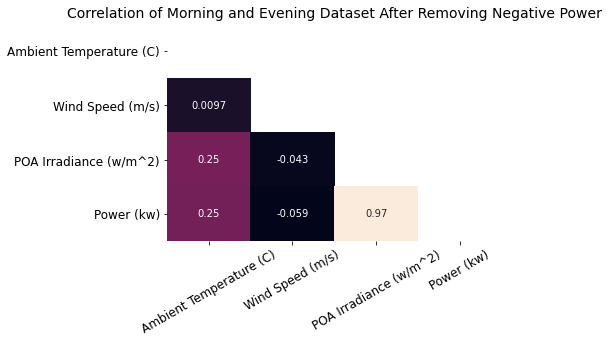

In [40]:
#Lokking at the correlation of different features of dataset. 
#developing function to get customized heatmap
def correlation_heat_map(df, title, size):
    corrs = df.corr()
    
    # set figure size
    fig, ax = plt.subplots(figsize = size)
    
    # generate a mask for the upper triagle 
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    #plot heatmap
    ax = sns.heatmap(corrs, mask=mask, annot = True, cbar=False)
    
    #resize labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_title(title, fontsize=14)
    
    plt.show()
correlation_heat_map(df4[['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)','Power (kw)']], 'Correlation of Morning and Evening Dataset After Removing Negative Power', (6,4))

Populating the interactive namespace from numpy and matplotlib
0.9421379628294339
2.479459199641656
58.63183294093858


<ipython-input-41-9161b74a3c00>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


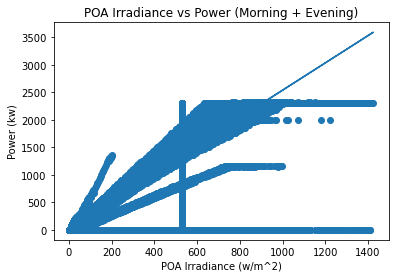

In [41]:
#Lets check the parameters for fitting linear model for power 
import scipy.stats
%pylab inline
m4, b4, r_value4, p_value4, std_err4 = scipy.stats.linregress(df4['POA Irradiance (w/m^2)'], df4['Power (kw)'])

fig, ax = plt.subplots()
ax.scatter(df4['POA Irradiance (w/m^2)'],df4['Power (kw)'])
ax.plot(df4['POA Irradiance (w/m^2)'], m4*df4['POA Irradiance (w/m^2)'] + b4)
ax.set_xlabel("POA Irradiance (w/m^2)")
ax.set_ylabel("Power (kw)")
ax.set_title("POA Irradiance vs Power (Morning + Evening)")  
fig.show()

print(r_value4**2)
print(m4)
print(b4)

Lets check if there are any zero in irradiance. If yes then power should also be zero at that row. 

In [42]:
#where are the POA Irradiance negative
Zero_df_POA= df.loc[(df['POA Irradiance (w/m^2)'] == 0)]
Zero_df_POA

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-07-31 19:11:00-07:00,18.796336,11.397690,0.0,-0.693052
2017-06-06 19:19:00-07:00,16.015154,6.797773,0.0,-0.691204
2017-06-06 19:20:00-07:00,15.870385,6.995707,0.0,-0.691696
2017-06-06 19:21:00-07:00,16.039777,6.306685,0.0,-0.690683
2017-06-06 19:22:00-07:00,15.995460,6.093731,0.0,-0.692691
...,...,...,...,...
2020-10-17 06:23:00-07:00,8.314301,6.301292,0.0,-0.692418
2020-10-17 06:24:00-07:00,8.493870,6.201638,0.0,-0.691915
2020-10-25 17:01:00-07:00,5.010310,3.198518,0.0,-0.693371


So, at these 222 rows, power should also be zero

## Filtering the Small Negative Power

In [43]:
df['Power (kw)'] = np.where(df['Power (kw)'] < 0, m4*df['POA Irradiance (w/m^2)'] + b4 ,df['Power (kw)'])

#Counting no of negative power values
(df['Power (kw)'] < 0).sum().sum()

0

In [44]:
#Counting no of Zeros in power
(df['Power (kw)'] == 0).sum().sum()

9165

But we need to work on 222 rows where there is zero POA irradiance where power production is not possible

In [45]:
df['Power (kw)'] = np.where(df['POA Irradiance (w/m^2)'] == 0, 0 ,df['Power (kw)'])
(df['Power (kw)'] == 0).sum().sum()

9387

In [46]:
9387-9165

222

I will discuss about the Issue in Filtering with this method at end of code after Normalizing Power with the meteorological variables

## Other Issues on Data

Lets see average daily, monthy and yearly solar power production

C:\Users\rabdhaka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


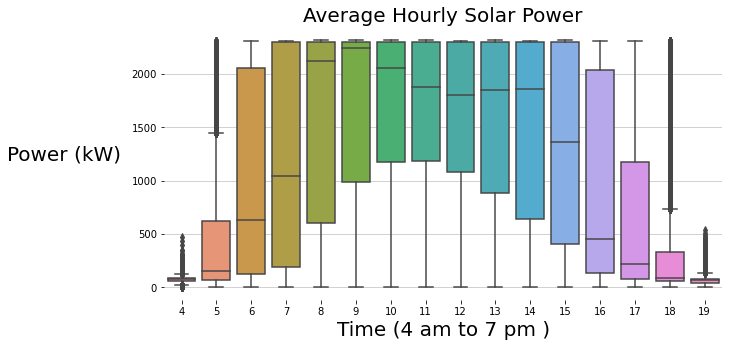

In [47]:
# I am going to create a new data frame so I can make the appropriate boxplots. 
df5= df.reset_index()
df5['hour'] = df5['datetime'].dt.hour

# Create a boxplot of the average solar generation production

plt.figure(figsize=(10,5))
sns.boxplot(df5['hour'], df5['Power (kw)'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_axisbelow(True)
plt.gca().grid(axis='y',alpha=.7)

plt.title('Average Hourly Solar Power',fontsize=20)

plt.xlabel('Time (4 am to 7 pm )', fontsize=20)

plt.ylabel("Power (kW) ",rotation='0',ha='right', fontsize=20)
plt.show()

We see that the data has a large interquartile range. It follows the pattern we would expect with the the average solar production being highest around mid-day

C:\Users\rabdhaka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


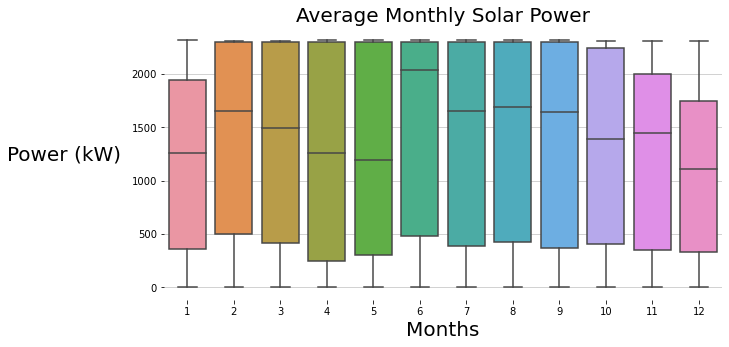

In [48]:
# I am going to create a new data frame so I can make the appropriate boxplots. 
df6= df.reset_index()
df6['month'] = df6['datetime'].dt.month

# Create a boxplot of the average solar generation production of every months

plt.figure(figsize=(10,5))
sns.boxplot(df6['month'], df6['Power (kw)'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_axisbelow(True)
plt.gca().grid(axis='y',alpha=.7)

plt.title('Average Monthly Solar Power',fontsize=20)

plt.xlabel('Months', fontsize=20)

plt.ylabel("Power (kW) ",rotation='0',ha='right', fontsize=20)
plt.show()

Dec and Jan are two months where there is less amount of power production. Obviously it should be winter

C:\Users\rabdhaka\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


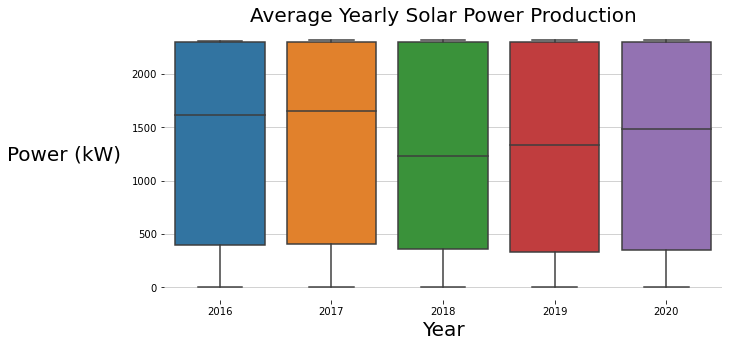

In [49]:
# I am going to create a new data frame so I can make the appropriate boxplots. 
df7= df.reset_index()
df7['Year'] = df7['datetime'].dt.year

# Create a boxplot of the average solar generation production of every months

plt.figure(figsize=(10,5))
sns.boxplot(df7['Year'], df7['Power (kw)'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_axisbelow(True)
plt.gca().grid(axis='y',alpha=.7)

plt.title('Average Yearly Solar Power Production',fontsize=20)

plt.xlabel('Year', fontsize=20)

plt.ylabel("Power (kW) ",rotation='0',ha='right', fontsize=20)
plt.show()

In [50]:
df['2016'].describe().transpose()

<ipython-input-50-f8b539fa6f64>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2016'].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),267850.0,13.277954,9.960561,-20.692647,6.007999,14.377788,20.909423,34.105070
Wind Speed (m/s),267850.0,3.543899,2.928910,0.199234,1.700020,2.698247,4.294937,28.083883
POA Irradiance (w/m^2),267850.0,500.996242,366.683479,0.000000,128.891766,516.016036,850.583149,1504.329478
Power (kw),267850.0,1379.742650,907.116737,0.000000,399.363054,1614.555520,2305.263367,2315.518852


In [51]:
df['2017'].describe().transpose()

<ipython-input-51-8fd23aa48dcf>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017'].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),267267.0,14.919330,10.063912,-28.564103,7.098934,16.189393,22.690926,38.376114
Wind Speed (m/s),267267.0,3.419580,2.713319,0.000000,1.700123,2.699555,4.199729,30.055129
POA Irradiance (w/m^2),267267.0,521.000456,372.190198,0.000000,141.649927,540.930630,880.783070,1508.818311
Power (kw),267267.0,1382.076815,903.684013,0.000000,412.076020,1653.157708,2305.050752,2317.143741


In [52]:
df['2018'].describe().transpose()

<ipython-input-52-086af41391ef>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2018'].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),267265.0,13.796190,10.603342,-22.834187,7.202290,15.237834,21.765857,36.035499
Wind Speed (m/s),267265.0,3.647108,2.937416,0.000000,1.701411,2.797503,4.498100,23.776307
POA Irradiance (w/m^2),267265.0,495.713427,373.686620,0.000000,127.385150,456.614549,854.410540,1537.720755
Power (kw),267265.0,1279.232964,892.198738,0.000000,363.392639,1234.544227,2303.812470,2315.802581


In [53]:
df['2019'].describe().transpose()

<ipython-input-53-eb29f7242668>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019'].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),267265.0,14.882510,9.752638,-24.507311,8.595198,15.388065,22.399554,36.467840
Wind Speed (m/s),267265.0,3.549103,2.829983,0.000000,1.704272,2.797919,4.307446,27.011302
POA Irradiance (w/m^2),267265.0,493.077304,374.310155,0.000000,119.788208,462.885399,850.568319,1531.471585
Power (kw),267265.0,1264.772736,882.689327,0.000000,335.562312,1336.981369,2301.096857,2316.208820


In [54]:
df['2020'].describe().transpose()

<ipython-input-54-6c7f1beab8a9>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020'].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),267840.0,13.453466,9.827956,-26.896399,6.407766,14.097353,22.286912,35.949201
Wind Speed (m/s),267840.0,3.676827,2.982276,0.199270,1.797161,2.800351,4.503777,30.425901
POA Irradiance (w/m^2),267840.0,528.190641,377.084999,0.000000,148.601300,541.450505,879.486486,1473.907163
Power (kw),267840.0,1316.364612,899.026950,0.000000,352.958667,1488.214688,2303.802422,2315.936664


We cannot clearly say the about power production of each year as it is almost the same. 

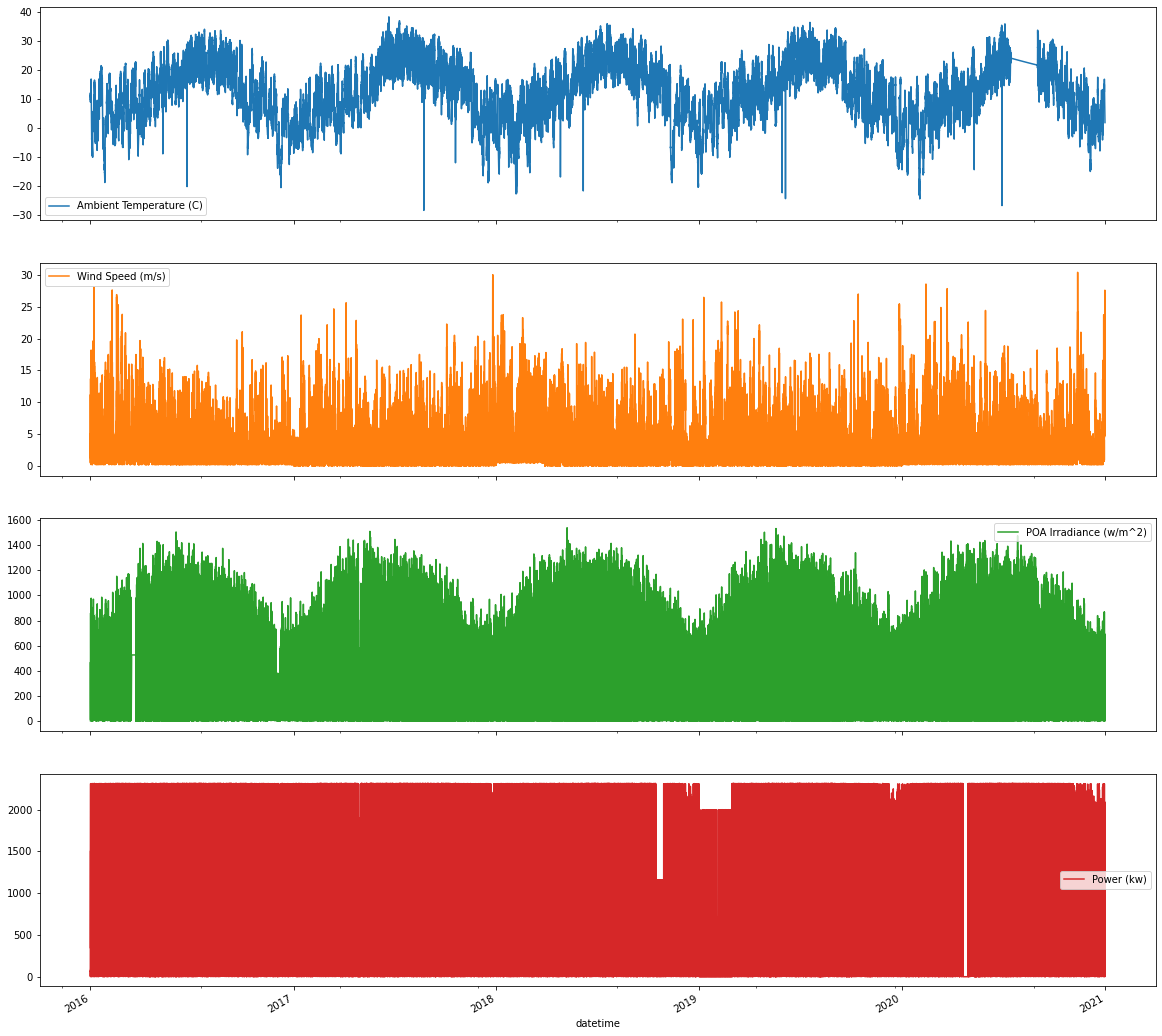

In [55]:
#Lets check the overall dataset after filtering and filling NaNs
plot_cols = ['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)', 'Power (kw)']
plot_features = df[plot_cols]
_ = plot_features.plot(subplots=True, figsize = (20,20))

In [56]:
#Looking at the statistics of dataset after filtering 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),1337487.0,14.065283,10.070531,-28.564103,7.004606,15.079118,22.074986,38.376114
Wind Speed (m/s),1337487.0,3.567340,2.881480,0.000000,1.701281,2.703738,4.394156,30.425901
POA Irradiance (w/m^2),1337487.0,507.801428,373.073558,0.000000,132.800310,505.539417,863.440847,1537.720755
Power (kw),1337487.0,1324.458760,898.331322,0.000000,371.922784,1460.447735,2304.346765,2317.143741


Some data are missing in the some months of 2022. We need to figure it out which data are missing. Lets check the data of the year 2019 and 2020 as we can see different plot as we not expect.

In [57]:
df_2018 = df['2018']
df_2018

<ipython-input-57-0c05ef9097e5>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2018 = df['2018']


,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2018-01-01 07:24:00-07:00,2.101710,3.501967,6.657663,75.139237
2018-01-01 07:25:00-07:00,2.002000,2.701344,6.500058,74.748462
2018-01-01 07:26:00-07:00,2.004117,2.297727,1.500708,62.352778
2018-01-01 07:27:00-07:00,2.002301,2.200290,1.804811,63.106788
2018-01-01 07:28:00-07:00,1.900223,2.697616,2.198121,64.081985
...,...,...,...,...
2018-12-31 16:41:00-07:00,-4.895673,1.499143,6.991936,75.968053
2018-12-31 16:42:00-07:00,-4.795069,1.400169,6.503565,74.757157
2018-12-31 16:43:00-07:00,-4.797467,1.398589,9.333253,81.773252


<AxesSubplot:xlabel='datetime'>

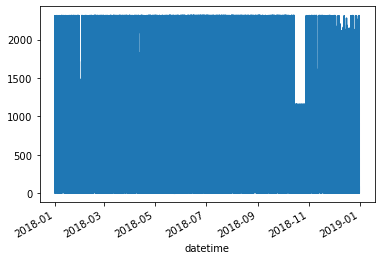

In [58]:
df_2018['Power (kw)'].plot()

We found out that it is in the months of 10 i.e October. Lets check that.

<ipython-input-59-b50bd095f1c4>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2018_Oct = df_2018['2018-10']


Text(0, 0.5, 'Power (kw)')

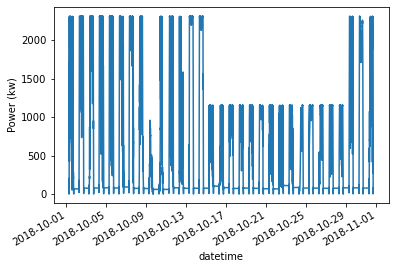

In [59]:
df_2018_Oct = df_2018['2018-10']
ax = df_2018_Oct['Power (kw)'].plot()
ax.set_ylabel("Power (kw)")

In [60]:
#df_2018_Oct.describe()
df_2018_Oct.loc['2018-10-16':'2018-10-29'].describe()

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
count,9132.000000,9132.000000,9132.000000,9132.000000
mean,17.221796,3.261355,522.410732,815.098878
std,5.235884,2.511559,298.351579,507.389199
min,4.191915,0.000000,2.801524,0.537126
25%,13.014186,1.597893,235.191832,356.310737
50%,18.100684,2.498122,670.574639,993.839502
75%,21.489092,4.005762,771.417087,1151.446204
max,28.296380,15.204024,1071.076406,2311.433237


It is seen that the power produced for 15 days form 16th Oct to 29th Oct of the year 2018 is lower than other days.

<ipython-input-61-1342d09bb563>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2020 = df['2020']


Text(17.200000000000003, 0.5, 'Power (kw)')

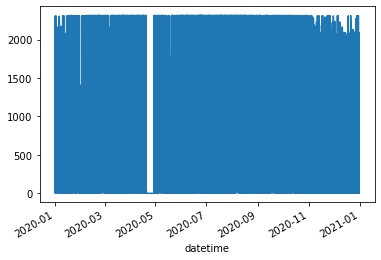

In [61]:
df_2020 = df['2020']
df_2020['Power (kw)'].plot()
ax.set_ylabel("Power (kw)")

<ipython-input-62-1f3a4b099df3>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2020_Apr = df['2020-4']


Text(0, 0.5, 'Power (kw)')

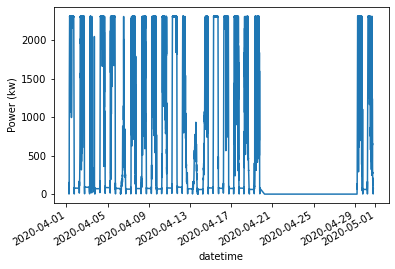

In [62]:
df_2020_Apr = df['2020-4']
ax = df_2020_Apr['Power (kw)'].plot()
ax.set_ylabel("Power (kw)")

In [63]:
#df_Power_April = df_2020_Apr['Power (kw)']
df_2020_Apr.loc['2020-04-20':'2020-04-28'].describe()

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
count,7374.000000,7374.000000,7374.000000,7374.0
mean,8.291081,3.811707,502.703997,0.0
std,5.189347,2.961639,432.978790,0.0
min,-1.598791,0.199653,0.299671,0.0
25%,4.504164,1.701131,102.213808,0.0
50%,7.810830,2.705756,335.349495,0.0
75%,11.302295,5.005439,1031.395029,0.0
max,20.618778,15.930229,1410.996625,0.0


In [64]:
df_2020_Apr.loc['2020-04-20':'2020-04-28'].describe()

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
count,7374.000000,7374.000000,7374.000000,7374.0
mean,8.291081,3.811707,502.703997,0.0
std,5.189347,2.961639,432.978790,0.0
min,-1.598791,0.199653,0.299671,0.0
25%,4.504164,1.701131,102.213808,0.0
50%,7.810830,2.705756,335.349495,0.0
75%,11.302295,5.005439,1031.395029,0.0
max,20.618778,15.930229,1410.996625,0.0


It is clearly seen that the PV power plant is not producing any energy for 9 days from April 20th to April 28 of 2020. This missing information will be problem if we want to make prediction model to estimate power. So, we can replace it by average power at the same time from previous year. 

Issues in the values in POA Irradiance

<ipython-input-65-1c619913ed70>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2016 = df['2016']


Text(17.200000000000003, 0.5, 'POA Irradiance (w/m^2)')

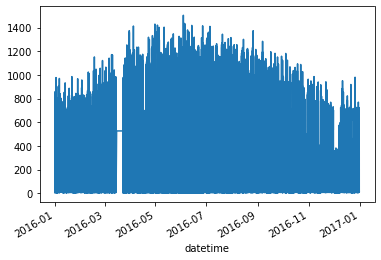

In [65]:
df_2016 = df['2016']
df_2016['POA Irradiance (w/m^2)'].plot()
ax.set_ylabel("POA Irradiance (w/m^2)")

<ipython-input-66-b102ee78350d>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2016_Mar = df['2016-3']


Text(0, 0.5, 'POA Irradiance (w/m^2)')

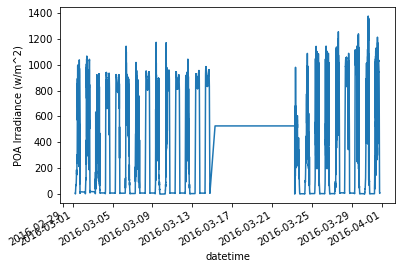

In [66]:
df_2016_Mar = df['2016-3']
ax = df_2016_Mar['POA Irradiance (w/m^2)'].plot()
ax.set_ylabel("POA Irradiance (w/m^2)")

In [67]:
df_2016_Mar.loc['2016-03-16':'2016-03-22'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),5085.0,15.343889,4.482094,2.798603,12.412933,16.172625,18.912327,22.832796
Wind Speed (m/s),5085.0,4.016026,2.872170,0.199602,1.797912,2.997993,6.190864,15.896758
POA Irradiance (w/m^2),5085.0,527.000000,0.000000,527.000000,527.000000,527.000000,527.000000,527.000000
Power (kw),5085.0,1469.695644,858.995473,1.542992,596.239082,1690.962458,2305.685610,2312.886007


### Filtering of Constant Irradiance Value with the help of Power


In [68]:
(df['POA Irradiance (w/m^2)'] == 527).sum().sum()

5803

In [69]:
df['2016-03']

<ipython-input-69-05cd8f5a7c11>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2016-03']


,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-03-01 06:34:00-07:00,-1.199620,0.599901,8.097727,78.709817
2016-03-01 06:35:00-07:00,-1.201518,1.000440,7.796633,77.963266
2016-03-01 06:36:00-07:00,-1.200373,1.199753,2.416313,64.622982
2016-03-01 06:37:00-07:00,-1.198487,1.398393,2.792280,65.555177
2016-03-01 06:38:00-07:00,-1.200376,1.398559,3.215109,66.603565
...,...,...,...,...
2016-03-31 18:19:00-07:00,5.092233,4.900378,7.694632,77.710359
2016-03-31 18:20:00-07:00,5.099969,3.905820,7.208504,76.505025
2016-03-31 18:21:00-07:00,4.902950,4.098645,7.003314,75.996264


In [70]:
#df['POA Irradiance (w/m^2)'] = np.where((df['POA Irradiance (w/m^2)'] == 527) & (df['2016-3']), (1/m4)*df['Power (kw)'] - (b4/m4) , df['POA Irradiance (w/m^2)'])


In the months of Mar. There is constant irradiation of 527 w/m2 for seven days. This should obviously be an error in measureing POA irradiation as the power fluctuages in this time. 

Issues in Ambient Temperature

<ipython-input-71-48bdb1283a88>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_20201 = df['2020']


Text(23.64051992476631, 0.5, 'Ambient Temperature (C)')

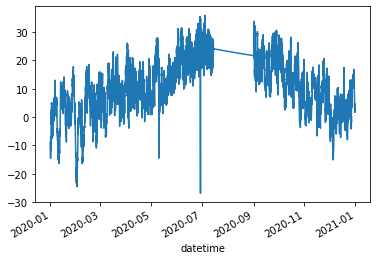

In [71]:
df_20201 = df['2020']
df_20201['Ambient Temperature (C)'].plot()
ax.set_ylabel("Ambient Temperature (C)")

Text(0, 0.5, 'Ambient Temperature (C)')

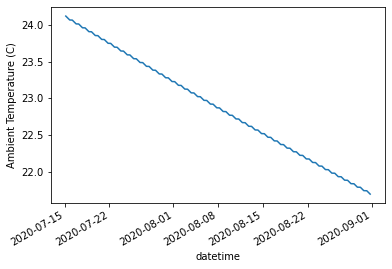

In [72]:
df_20201_JA = df['2020-7-15': '2020-8-31']
ax = df_20201_JA['Ambient Temperature (C)'].plot()
ax.set_ylabel("Ambient Temperature (C)")

The temperature for 1 and half months between July 15 to Sep1 it is in decreasing trend but it should not be that much linear. It might be extrapolated by the human 

# Meteorological Normalization of PV Plant Performance
We have seen from the scatter plot and corresponding R2 value. Only POA Irradiance and Power have liner fitting. However, other have not any linear correlation with Power. So, linear model doesnot fit to evaluate PV performance.

In [73]:
#Importing library for normalie performance using regression trees
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [74]:
#Classify the data set into predictors and targe and also normalize the predictor to have value between 0 and 1 so that it would be easier for model to predict. 
target_column = ['Power (kw)'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
count,1.337487e+06,1.337487e+06,1.337487e+06,1.337487e+06
mean,3.665114e-01,1.172468e-01,3.302299e-01,1.324459e+03
std,2.624166e-01,9.470483e-02,2.426146e-01,8.983313e+02
min,-7.443198e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.825251e-01,5.591554e-02,8.636179e-02,3.719228e+02
50%,3.929298e-01,8.886305e-02,3.287589e-01,1.460448e+03
75%,5.752272e-01,1.444216e-01,5.615069e-01,2.304347e+03
max,1.000000e+00,1.000000e+00,1.000000e+00,2.317144e+03


In [75]:
#train test split
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(936240, 3)
(401247, 3)


In [76]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [77]:
DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
               max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=0.13,
               min_samples_split=2, min_weight_fraction_leaf=0.0,
             random_state=3, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=8, min_samples_leaf=0.13,
                      random_state=3)

In [78]:
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

216.58511449740038
0.9418888452332536
215.6153088558037
0.9423528154637427


In [79]:
#Hyperparameter tuning to get optimized output. 
# Code Lines 1 to 4: Fit the regression tree 'dtree1' and 'dtree2' 
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree3 = DecisionTreeRegressor(max_depth=7)

dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)
dtree3.fit(X_train, y_train)

# Code Lines 5 to 6: Predict on training data
tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train)
tr3 = dtree3.predict(X_train)

#Code Lines 7 to 8: Predict on testing data
y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test) 
y3 = dtree3.predict(X_test)

In [80]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1)) 

232.07013791381965
0.9332823383892813
231.27260034108517
0.9336765235155442


In [81]:
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr3))) 
print(r2_score(y_train, tr3))

# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y3))) 
print(r2_score(y_test, y3))

174.70677723103967
0.9621886833406025
173.9446751695402
0.9624818692283573


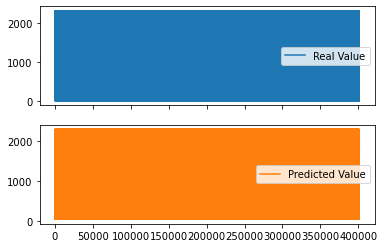

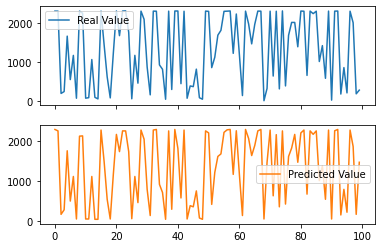

In [82]:
df_plot1 = pd.DataFrame(y_test)
df_plot2 = pd.DataFrame(y3)
df_plot =[df_plot1, df_plot2]
df_plotf = pd.concat(df_plot, axis = 1)
df_plotf.columns = ['Real Value', 'Predicted Value']

plot_cols = ['Real Value', 'Predicted Value']
plot_features = df_plotf[plot_cols]
_ = plot_features.plot(subplots=True)

plot_features = df_plotf[plot_cols][:100] # Taking 480 points as a sample 
_ = plot_features.plot(subplots=True)

# Issues in the Filtering : Future Works for Improvement

In [83]:
Low_I= df[df['POA Irradiance (w/m^2)'].between(0,20, inclusive = True)]
Low_I.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),1337487.0,0.366511,0.262417,-0.74432,0.182525,0.392930,0.575227,1.000000
Wind Speed (m/s),1337487.0,0.117247,0.094705,0.00000,0.055916,0.088863,0.144422,1.000000
POA Irradiance (w/m^2),1337487.0,0.330230,0.242615,0.00000,0.086362,0.328759,0.561507,1.000000
Power (kw),1337487.0,1324.458760,898.331322,0.00000,371.922784,1460.447735,2304.346765,2317.143741


<AxesSubplot:xlabel='Power (kw)', ylabel='Count'>

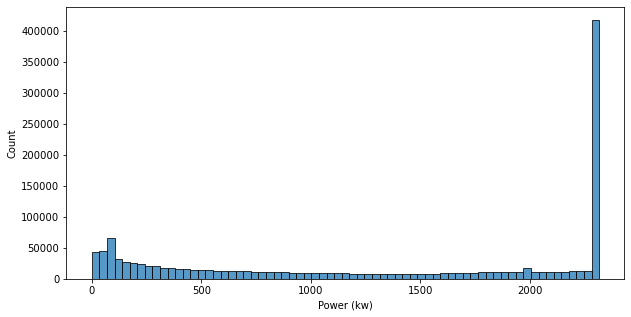

In [84]:
plt.figure(figsize=(10,5))
sns.histplot(Low_I['Power (kw)'])

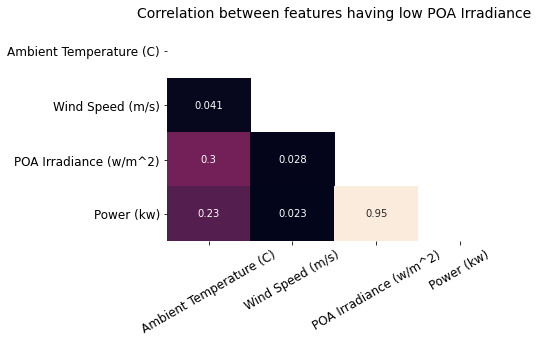

In [85]:
#Lokking at the correlation of different features of dataset. 
#developing function to get customized heatmap
def correlation_heat_map(df, title, size):
    """DOCSTRING
    This function plots a correlation heatmap for a dataframe, masking duplicate values.
    """
    corrs = df.corr()
    
    # set figure size
    fig, ax = plt.subplots(figsize = size)
    
    # generate a mask for the upper triagle 
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    #plot heatmap
    ax = sns.heatmap(corrs, mask=mask, annot = True, cbar=False)
    
    #resize labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_title(title, fontsize=14)
    
    plt.show()
correlation_heat_map(Low_I[['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)','Power (kw)']], 'Correlation between features having low POA Irradiance', (6,4))

Populating the interactive namespace from numpy and matplotlib


C:\Users\rabdhaka\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


0.9115598754597942


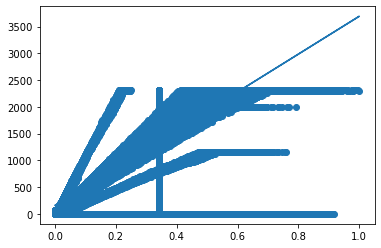

In [86]:
#Looking at the linear relationship of power with Irradiance in high negative power data set
import scipy.stats
%pylab inline
m6, b6, r_value, p_value, std_err = scipy.stats.linregress(Low_I['POA Irradiance (w/m^2)'], Low_I['Power (kw)'])

fig, ax = plt.subplots()
ax.scatter(Low_I['POA Irradiance (w/m^2)'].abs(),Low_I['Power (kw)'])
ax.plot(Low_I['POA Irradiance (w/m^2)'].abs(), m6*Low_I['POA Irradiance (w/m^2)'] + b6)
print(r_value**2)
#ax.ann

In [87]:
Low_Po= df[df['Power (kw)'].between(0,100, inclusive = True)]
Low_Po.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),150582.0,0.295819,0.253646,-0.641075,0.114644,0.302241,0.500027,0.848973
Wind Speed (m/s),150582.0,0.115068,0.085531,0.000000,0.055999,0.095259,0.144766,0.975369
POA Irradiance (w/m^2),150582.0,0.033057,0.110032,0.000000,0.005198,0.010039,0.017903,0.917590
Power (kw),150582.0,53.907363,30.047484,0.000000,28.237260,63.368174,77.994650,99.999871


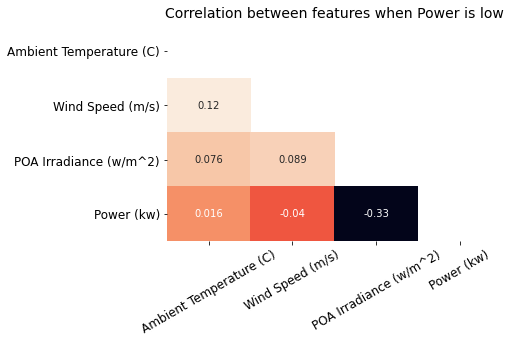

In [88]:
#Lokking at the correlation of different features of dataset. 
#developing function to get customized heatmap
def correlation_heat_map(df, title, size):
    """DOCSTRING
    This function plots a correlation heatmap for a dataframe, masking duplicate values.
    """
    corrs = df.corr()
    
    # set figure size
    fig, ax = plt.subplots(figsize = size)
    
    # generate a mask for the upper triagle 
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    #plot heatmap
    ax = sns.heatmap(corrs, mask=mask, annot = True, cbar=False)
    
    #resize labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_title(title, fontsize=14)
    
    plt.show()
correlation_heat_map(Low_Po[['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)','Power (kw)']], 'Correlation between features when Power is low', (6,4))

Populating the interactive namespace from numpy and matplotlib
0.11060984537568741


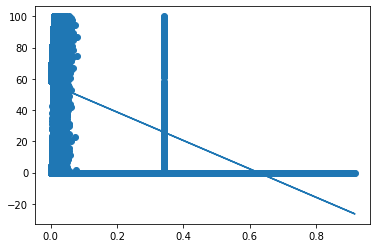

In [89]:
#Looking at the linear relationship of power with Irradiance in high negative power data set
import scipy.stats
%pylab inline
m7, b7, r_value, p_value, std_err = scipy.stats.linregress(Low_Po['POA Irradiance (w/m^2)'], Low_Po['Power (kw)'])

fig, ax = plt.subplots()
ax.scatter(Low_Po['POA Irradiance (w/m^2)'].abs(),Low_Po['Power (kw)'])
ax.plot(Low_Po['POA Irradiance (w/m^2)'].abs(), m7*Low_Po['POA Irradiance (w/m^2)'] + b7)
print(r_value**2)
#ax.ann

In [90]:
The model we assume fails when there is low amount of power. 

SyntaxError: invalid syntax (<ipython-input-90-627a0c956996>, line 1)